In [4]:
import pandas as pd
import numpy as np
import random
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from functools import partial
import pylab
import numpy as np
import numpy.linalg as npla

data = pd.read_csv("letter-recognition.csv")
print("Dimensions: ", data.shape, "\n")
print(data.info())
data.head()

Dimensions:  (20000, 17) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB
None


,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [5]:
dataMean = data.groupby('letter').mean()
dataMean.head()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
letter,,,,,,,,,,,,,,,,
A,3.337136,6.975919,5.128010,5.178707,2.991128,8.851711,3.631179,2.755387,2.043093,7.802281,2.338403,8.465146,2.771863,6.321926,2.875792,7.468948
B,3.985640,6.962141,5.088773,5.169713,4.596606,7.671018,7.062663,5.366841,5.571802,7.954308,5.506527,6.652742,3.117493,7.919060,6.612272,9.100522
C,4.031250,7.063859,4.701087,5.296196,2.775815,5.437500,7.627717,5.927989,7.177989,8.773098,7.494565,11.947011,1.991848,8.876359,4.080163,8.555707
D,4.023602,7.244720,5.170186,5.288199,4.026087,7.539130,6.806211,5.921739,6.508075,8.166460,5.111801,5.750311,3.365217,7.813665,3.971429,7.628571
E,3.727865,6.944010,4.756510,5.201823,3.679688,5.966146,7.352865,4.223958,7.585938,8.507812,6.242188,10.341146,2.127604,8.298177,6.022135,8.506510


In [6]:

round(data.drop('letter', axis=1).mean(), 2)


X = data.drop("letter", axis = 1)
y = data['letter']

scaleX = scale(X)

trainX, testX, trainY, testY = train_test_split(scaleX, y, test_size = 0.3, random_state = 101)


In [7]:
def markovSampling(trainX, YTrain):
     
    Init_sampl = np.concatenate((np.vstack(trainX), np.vstack(YTrain.to_numpy())), axis = 1)
    trainingSampleSet = random.sample(list(Init_sampl), 2000)

    M = len(trainingSampleSet)
    print("M : " , M)


    i = np.random.choice(len(trainingSampleSet), 1, replace=False)  
    D = np.array(trainingSampleSet)
    currentSample = D[i][0]

    print("currentSample : ", currentSample)

    Mminus = 0
    Mplus = 0

    if M%2 == 0:
        if currentSample[16] == 'A':
            Mplus = Mplus + 1
        else:
            Mminus = Mminus+1

    sample = []
    pone = 0
    ptwo = 0

    print(currentSample)
    k = 5
    q = 1.2

    while( Mminus + Mplus < M ):
        ZStar = D[np.random.choice(len(trainingSampleSet), 1, replace=False)][0]
        Probability = 1
        yt = currentSample[16]
        currentSample = ZStar
        if Probability == 1:
            if currentSample[16] == yt:
                sample.append(ZStar) 
            else:
                sample.append(ZStar) 
                
        if len(sample) == k:
            ptwo = q*Probability
            sample.append(ZStar) 
            

        if yt == 'A':
            Mplus = Mplus+1
        else:
            Mminus = Mminus+1

        if pone > 1 or Probability > 1 or ptwo > 1:
            sample.append(ZStar)

    return sample


In [8]:
Nsample = np.array(markovSampling(trainX, trainY))
print(Nsample.shape)
trainX = Nsample[:, 0:16]
trainY = Nsample[:, 16]

print(trainX.shape)
print(trainY.shape)

M :  2000
currentSample :  ['-1.0576982957256178' '-1.826463877501453' '-1.0532766758635548'
 '-1.9335711564688303' '-0.6874761975053775' '-0.4430438069275676'
 '-0.21521994542421233' '0.13756063124022405' '0.34499438865456755'
 '-0.5152079462902271' '-0.17255767607664324' '0.03412531311909184'
 '0.8376911587466098' '-0.21908162939303566' '-0.26947711190847695'
 '0.12291106712560491' 'H']
['-1.0576982957256178' '-1.826463877501453' '-1.0532766758635548'
 '-1.9335711564688303' '-0.6874761975053775' '-0.4430438069275676'
 '-0.21521994542421233' '0.13756063124022405' '0.34499438865456755'
 '-0.5152079462902271' '-0.17255767607664324' '0.03412531311909184'
 '0.8376911587466098' '-0.21908162939303566' '-0.26947711190847695'
 '0.12291106712560491' 'H']
(3995, 17)
(3995, 16)
(3995,)


In [13]:

YTrain = []
for i in trainY:
    YTrain.append(ord(i))

YTest = []
for i in testY:
    YTest.append(ord(i))


In [14]:
def linearKernel():

    model_linear = SVC(kernel='linear')
    model_linear.fit(trainX, YTrain)
    YPred = model_linear.predict(testX)

 
    print("MCC:",  metrics.matthews_corrcoef(y_true = YTest, y_pred = YPred), "\n")
    print("accuracy:", metrics.accuracy_score(y_true = YTest, y_pred = YPred), "\n")
    print(metrics.confusion_matrix(y_true = YTest, y_pred = YPred))

def rbfkernel():

    non_linear_model = SVC(kernel='rbf')
    non_linear_model.fit(trainX, YTrain)
    YPred = non_linear_model.predict(testX)


    print("MCC:",  metrics.matthews_corrcoef(y_true=YTest, y_pred=YPred), "\n")
    print("accuracy:", metrics.accuracy_score(y_true=YTest, y_pred=YPred), "\n")
    print(metrics.confusion_matrix(y_true=YTest, y_pred=YPred))

def polykernel():
    non_linear_model = SVC(kernel='poly')
    non_linear_model.fit(trainX, YTrain)
    YPred = non_linear_model.predict(testX)


    print("MCC:", metrics.matthews_corrcoef(y_true=YTest, y_pred = YPred), "\n")
    print("accuracy:", metrics.accuracy_score(y_true= YTest, y_pred = YPred), "\n")
    print(metrics.confusion_matrix(y_true=YTest, y_pred= YPred))

In [15]:
print("Kernel = linear")
linearKernel()
print("")

print("Kernel = rbf")
rbfkernel()
print("")

print("Kernel = poly")
polykernel()
print("")

Kernel = linear
MCC: 0.7726628438577652 

accuracy: 0.7811666666666667 

[[190   0   0   0   0   0   0   0   0   0   1   0   0   0   3   0   0   2
    0   0   5   0   0   0   6   2]
 [  0 178   0   9   2   0   2   8   0   1   0   0   0   0   0   0   3   3
    5   1   0   4   0   0   2   0]
 [  0   0 185   0  13   0  11   0   0   0  10   1   2   0   3   0   1   0
    2   1   1   0   0   0   0   0]
 [  1  16   0 195   0   0   1  12   0   0   1   0   3   2   2   0   1   6
    3   3   1   0   0   1   0   0]
 [  0   0   7   0 186   1   6   2   0   0   2   9   0   0   0   0   1   1
   10   3   1   0   0   0   0   5]
 [  0   3   0   2   2 179   1   0   2   2   0   0   0   1   0   1   0   0
    6  15   1   1   1   0   8   0]
 [  2   1  14   6  14   0 142   0   0   0   6   3   6   1   1   0   0   2
   11   2   1   6   1   0   0   0]
 [  0   4   1  18   1   6   1 137   0   0   9   1   6   0   8   0   7   4
    0   0  10   3   0   0   1   0]
 [  2   1   1   5   0   3   0   0 184  10   0   1   0  

In [16]:

folds = KFold(n_splits = 5, shuffle = True, random_state = 101)
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],'C': [1, 10, 100, 1000]}]



model = SVC(kernel="rbf")

model_cv = GridSearchCV(estimator = model,param_grid = hyper_params,scoring= 'accuracy',cv = folds,verbose = 1,return_train_score=True)      


model_cv.fit(trainX, trainY)                  


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  1.3min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [17]:

Result = pd.DataFrame(model_cv.cv_results_)
Result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.474057,0.007658,0.199399,0.014898,1,0.01,"{'C': 1, 'gamma': 0.01}",0.843554,0.799750,0.811014,0.801001,0.804756,0.812015,0.016249,7,0.827910,0.826033,0.830726,0.831352,0.833542,0.829912,0.002645
1,0.936291,0.015738,0.218455,0.004654,1,0.001,"{'C': 1, 'gamma': 0.001}",0.479349,0.474343,0.465582,0.493116,0.461827,0.474844,0.011042,11,0.489675,0.484043,0.490613,0.484355,0.503442,0.490426,0.007037
2,1.138605,0.015736,0.228437,0.017990,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.096370,0.105131,0.067584,0.061327,0.083855,0.082854,0.016593,12,0.095119,0.092929,0.073217,0.070401,0.098248,0.085982,0.011730
3,0.292440,0.009632,0.131203,0.003333,10,0.01,"{'C': 10, 'gamma': 0.01}",0.947434,0.938673,0.909887,0.922403,0.939925,0.931665,0.013609,4,0.959324,0.957760,0.949625,0.956821,0.957447,0.956195,0.003387
4,0.471079,0.012093,0.197254,0.006121,10,0.001,"{'C': 10, 'gamma': 0.001}",0.823529,0.797247,0.806008,0.792240,0.799750,0.803755,0.010836,9,0.820401,0.825407,0.821339,0.821026,0.826345,0.822904,0.002464
5,0.912560,0.010872,0.221222,0.002932,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.484355,0.478098,0.469337,0.490613,0.465582,0.477597,0.009251,10,0.495307,0.488736,0.498436,0.489987,0.505632,0.495620,0.006122
6,0.253068,0.006032,0.097577,0.006777,100,0.01,"{'C': 100, 'gamma': 0.01}",0.986233,0.974969,0.974969,0.977472,0.979975,0.978723,0.004189,2,0.997810,0.997497,0.995932,0.996245,0.997497,0.996996,0.000756
7,0.316847,0.012160,0.141151,0.003909,100,0.001,"{'C': 100, 'gamma': 0.001}",0.919900,0.883605,0.886108,0.893617,0.903630,0.897372,0.013245,5,0.930851,0.925219,0.930851,0.925845,0.930225,0.928598,0.002522
8,0.458655,0.007732,0.194320,0.007946,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.821026,0.795995,0.808511,0.794743,0.802253,0.804506,0.009610,8,0.815394,0.823842,0.823217,0.825407,0.827597,0.823091,0.004135
9,0.255632,0.002456,0.090855,0.000949,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.992491,0.982478,0.983730,0.989987,0.987484,0.987234,0.003746,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


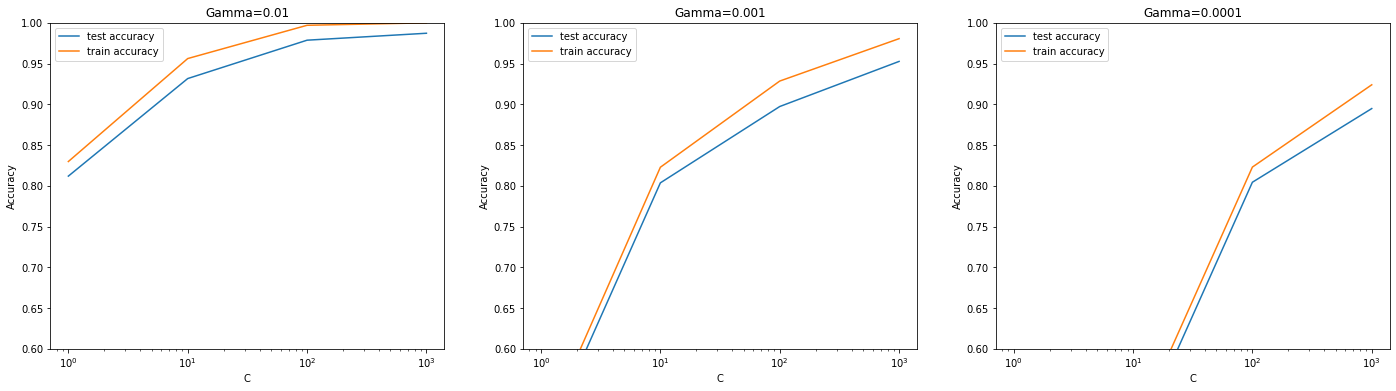

In [18]:

Result['param_C'] = Result['param_C'].astype('int')


plt.figure(figsize=(24,6))


plt.subplot(131)
gamma_01 = Result[Result['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


plt.subplot(132)
gamma_001 = Result[Result['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')



plt.subplot(133)
gamma_0001 = Result[Result['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


In [19]:
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score = {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))


model = SVC(C=1000, gamma=0.01, kernel="rbf")

model.fit(trainX, trainY)
YPred = model.predict(testX)


print("accuracy", metrics.accuracy_score(testY, YPred), "\n")
print(metrics.confusion_matrix(testY, YPred), "\n")


The best test score is 0.9872340425531915 corresponding to hyperparameters {'C': 1000, 'gamma': 0.01}
accuracy 0.8325 

[[192   0   0   1   0   0   0   0   0   0   1   0   0   0   0   0   0   2
    0   0   5   0   0   0   6   2]
 [  0 192   0   1   2   0   2   4   0   0   1   0   1   1   0   0   1   5
    2   0   0   5   0   1   0   0]
 [  0   0 181   0  10   0  10   1   0   0   9   3   1   0   4   0   2   0
    2   2   5   0   0   0   0   0]
 [  1  14   0 205   0   0   0   7   0   0   1   0   3   5   1   0   0   5
    0   3   1   0   0   1   0   1]
 [  0   1   8   0 194   0   7   1   0   0   4   5   1   0   0   0   1   0
    4   3   1   1   0   0   0   3]
 [  0   4   0   3   1 200   1   1   3   0   0   0   0   1   0   0   0   0
    3   7   0   0   1   0   0   0]
 [  1   1  12   7   5   2 162   0   1   0   3   0   5   0   2   0   2   2
    4   3   0   6   1   0   0   0]
 [  1   3   1  14   0   3   1 145   0   4  10   0   7   0   3   1   4   7
    0   1   8   3   0   0   1   0]
 [  4   